In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [85]:
suicide_rates=pd.read_csv("suicide_rates_1990-2022_transformed.csv")
age_std_suicide_rates=pd.read_csv("age_std_suicide_rates_1990-2022_transformed.csv")

Predictive modeling 

In [86]:
suicide_rates['Year']=suicide_rates['Year'].astype(int)
data=suicide_rates.drop(columns=['RegionCode','Sex','AgeGroup','RegionName','CountryName', 'CountryCode', 'CauseSpecificDeathPercentage',
                    'GDP', 'GDPPerCapita', 'GrossNationalIncome', 'GNIPerCapita', 'InflationRate',
                    'EmploymentPopulationRatio']) #dropping unnecessary columns to predict accurate suicide counts for next 7 years

In [87]:
data = data.groupby('Year').sum().reset_index() #grouping rows by year

In [88]:
X=data['Year'].values.reshape(-1, 1) #Input feature which converts the column into numpy array
y=data['SuicideCount'] # target variable

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42) #X variable holds the training and test data for input features
#y variable holds the training and test data for target variable


In [90]:
model = LinearRegression()  #creating a linear regression object
model.fit(X_train, y_train) #fitting the linear regression model to the training data

LinearRegression()

In [91]:
future_years=pd.DataFrame({'Year': range(2023, 2030)}) #creating a dataframe for next 7 years to predict
future_predictions=model.predict(future_years.values.reshape(-1, 1)) #reshaping the dataframe into numpy array and using the trained model to predict

In [92]:
future_predictions=pd.DataFrame({'Year': range(2023, 2030), 'SuicideCount': future_predictions})
future_predictions['SuicideCount']=future_predictions['SuicideCount'].apply(math.ceil)
print("Predicted Suicide Rates for the Next 7 Years from all over the world:")
print(future_predictions)

Predicted Suicide Rates for the Next 7 Years from all over the world:
   Year  SuicideCount
0  2023        205024
1  2024        204395
2  2025        203765
3  2026        203136
4  2027        202506
5  2028        201877
6  2029        201247


In [93]:
relevant_columns=['Year', 'GDP', 'GNI', 'GDPPerCapita', 'GNIPerCapita', 'InflationRate'] #Relevant columns contains the columns we are interested in
data_subset=age_std_suicide_rates[relevant_columns]

In [94]:
features=data_subset.iloc[:, :-1].values # input variables (economic indicators) obtained by selecting all columns except the inflation rate column
target=data_subset.iloc[:, -1].values #output variable containing only inflation rate column

In [95]:
scaler=StandardScaler()  #creating a standard scaler object to scale the features and target
features_scaled=scaler.fit_transform(features)
target_scaled=scaler.fit_transform(target.reshape(-1, 1))

In [96]:
X_train, X_test, y_train, y_test=train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42) #The dataset is split into training and testing sets with 80% of the data used for training 
#and 20% for testing

In [97]:
# a neural network is defined with 3 dense layers the first layer has 64 neurons and has input of shape equal to x_train
#the second layer has 32 neurons and the last layer has 1 neuron for output
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

C:\Users\nirma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
#The model is compiled with the Adam optimizer, mean squared error loss function, and mean absolute error metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [99]:
#The model is trained on the training data for 50 epoch with batch size of 32 validation data is used to measure the model's performance
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test)) 

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4619 - mae: 0.2215 - val_loss: 0.7130 - val_mae: 0.1700
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.5418 - mae: 0.1252 - val_loss: 0.7047 - val_mae: 0.1862
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.6558 - mae: 0.1441 - val_loss: 0.7133 - val_mae: 0.2153
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 1.1038 - mae: 0.1989 - val_loss: 0.6928 - val_mae: 0.1423
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3233 - mae: 0.1628 - val_loss: 0.6876 - val_mae: 0.1583
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.4476 - mae: 0.1192 - val_loss: 0.7057 - val_mae: 0.2126
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.7886 - mae: 0.1596 - val_loss: 0.6857 - val_mae: 0.1584
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 1.0687 - mae: 0.1690 - val_loss: 0.6835 - val_mae: 0.1350
Epoch 9/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 8

In [100]:
scaler_features=StandardScaler()  
features_scaled=scaler_features.fit_transform(features)
scaler_target=StandardScaler()
target_scaled=scaler_target.fit_transform(target.reshape(-1, 1)) #The target array is reshaped to have a single column using -1 to automatically adjust the number of rows based on the size of the original array. 
#This is done because fit_transform() expects a 2D array
data_subset_array=data_subset.values  # Convert DataFrame to NumPy array
future_years=np.arange(2023, 2029).reshape(-1, 1) #creating a numpy array from 2023 to 2028 to predict the inflation rate for those years
future_data=np.hstack((future_years, np.zeros((future_years.shape[0], 5)))) #inserting zeroes for all economic indicaators except for years
future_data_scaled=scaler_features.transform(future_data[:, :-1])
predicted_inflation_scaled=model.predict(future_data_scaled) #predicting the inflation rate for future years

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [101]:
print("predicted inflation rate for next 5 years")
j=0
for i in range(2023,2029):
    print(i,"  ",predicted_inflation_scaled[j])
    j+=1
    
    

predicted inflation rate for next 5 years
2023    [-0.00224527]
2024    [0.0036252]
2025    [0.00961212]
2026    [0.01559846]
2027    [0.02158515]
2028    [0.0275713]


Fruad detection

In [102]:
numerical_columns=['SuicideCount', 'DeathRatePer100K', 'GDP', 'GDPPerCapita']
for col in numerical_columns:
    # Check for outliers using Z-score
    z_scores = (suicide_rates[col]-suicide_rates[col].mean())/suicide_rates[col].std()
    outliers = suicide_rates[abs(z_scores) > 3]  # Detect outliers beyond 3 standard deviations
    if not outliers.empty:
        print(f"Outliers found in {col}:")
        print(outliers)

Outliers found in SuicideCount:
      RegionCode                       RegionName CountryCode  \
6754         CSA        Central and South America         BRA   
19160         EU                           Europe         DEU   
26140         AS                             Asia         JPN   
26141         AS                             Asia         JPN   
26142         AS                             Asia         JPN   
...          ...                              ...         ...   
73199        NAC  North America and the Caribbean         USA   
73200        NAC  North America and the Caribbean         USA   
73201        NAC  North America and the Caribbean         USA   
73202        NAC  North America and the Caribbean         USA   
73203        NAC  North America and the Caribbean         USA   

                    CountryName  Year   Sex     AgeGroup  SuicideCount  \
6754                     Brazil  2014  Male  25-34 years        1025.0   
19160                   Germany  1991  

In [103]:
model=IsolationForest(contamination=0.05)  # Adjust contamination based on fraud rate
model.fit(suicide_rates[numerical_columns])
outliers=model.predict(suicide_rates[numerical_columns])
suicide_rates['Outlier'] = outliers

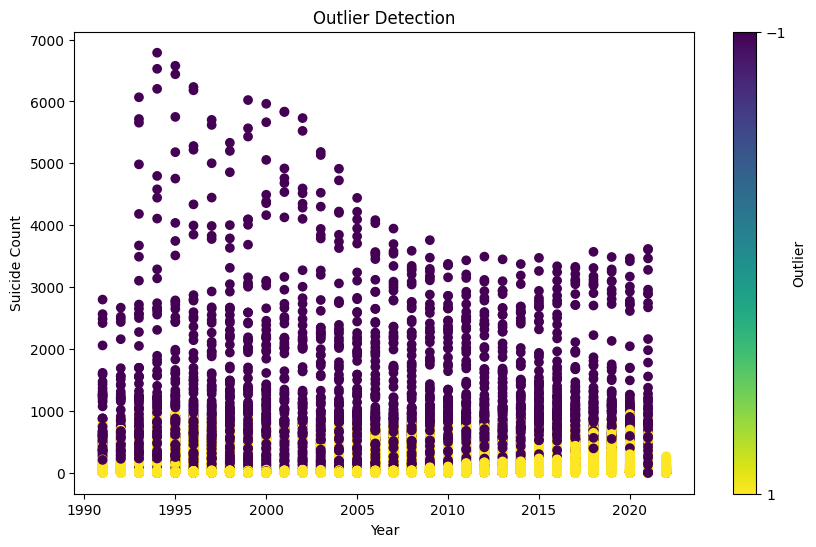

In [104]:
plt.figure(figsize=(10, 6))
scatter=plt.scatter(suicide_rates['Year'],suicide_rates['SuicideCount'],c=suicide_rates['Outlier'],cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Suicide Count')
plt.title('Outlier Detection')
colorbar=plt.colorbar(scatter, label='Outlier', ticks=[-1, 1])
colorbar.ax.invert_yaxis()
plt.show()